In [1]:
import plotly.graph_objs as go
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots


primary_yax_title= 'SI XEL acceleration [m/s2]'
secondary_yax_title= 'ADR burn rate [A/h]'
xax_title = 'Datetime [UTC]'
plot_title = 'F881- 400 Hz sensor data'

trace1 = go.Scatter(
    y=dfm['si_xel'],
    x=dfm['timestamp'],
    name='SI Cross Elevation [m/s2]',
    yaxis='y1',
#     annotation_text="setup",
#     annotation_position="top left",
#     annotation_textangle = 90

)
trace2 = go.Scatter(
    y=dfm['AmpHour'],
    x=dfm['timestamp'],
    name='ADR burn rate [A/h]',
    yaxis='y2'

)
# title = '400 Hz sensor data'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)

for i in range(3,len(leginfo)-2):
    legnum=i
    x=leginfo[legnum][0]+pd.DateOffset(days=1)+pd.DateOffset(hours=-7)
#     print(x, str(leginfo[legnum][1]))
    fig.add_vline(x, line_width=2, line_dash="dash", line_color="green"
             )

    
fig['layout'].update(height = 600, width = 1500, title = plot_title,xaxis=dict(tickangle=-90
    ))

# Set x-axis title
fig.update_xaxes(title_text=xax_title)

# Set y-axes titles
fig.update_yaxes(title_text=primary_yax_title, secondary_y=False,color='blue')
fig.update_yaxes(title_text=secondary_yax_title, secondary_y=True,range=[-0.6,0.6],color='blue')


legnum=2
xl=leginfo[legnum][0]+pd.DateOffset(days=1)+pd.DateOffset(hours=-7)
fig.add_annotation(dict(font=dict(color='magenta',size=15),
                                        x=xl,
                                        y=7,
                                        showarrow=False,
                                        text="clear",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

iplot(fig)

#---------------------------------------------

primary_yax_title= 'SI EL acceleration [m/s2]'
secondary_yax_title= 'ADR burn rate [A/h]'
xax_title = 'Datetime [UTC]'
# plot_title =  'F881-QUENTIN 400 Hz sensor data'

trace1 =  go.Scatter(
    x=dfm['timestamp'],
    y=dfm['si_el'],
    yaxis='y1',
    name='SI Cross Elevation acc. [m/s2]',
    line_dash=None

)
trace2 = go.Scatter(
    y=dfm['AmpHour'],
    x=dfm['timestamp'],
    yaxis='y2',
    name='ADR burn rate [A/h]'
    

)
# title = '400 Hz sensor data'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1500, title = None,xaxis=dict(tickangle=-90
    ))

for i in range(3,len(leginfo)-2):
    legnum=i
    x=leginfo[legnum][0]+pd.DateOffset(days=1)+pd.DateOffset(hours=-7)
#     print(x, str(leginfo[legnum][1]))
    fig.add_vline(x, line_width=2, line_dash="dash", line_color="green"
             )


# Set x-axis title
fig.update_xaxes(title_text=xax_title)

# Set y-axes titles
fig.update_yaxes(title_text=primary_yax_title, secondary_y=False,color='blue')
fig.update_yaxes(title_text=secondary_yax_title, secondary_y=True,range=[-0.6,.6],color='red')

iplot(fig)

###-------------------------------

trace1 =  go.Scatter(
    x=dfm['timestamp'],
    y=dfm['si_los'],
    yaxis='y1',
    name='SI LOS acceleration [m/s2]',
    line_dash=None

)
trace2 = go.Scatter(
    y=dfm['AmpHour'],
    x=dfm['timestamp'],
    yaxis='y2',
    name='ADR burn rate [A/h]'

)
# title = '400 Hz sensor data'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1500, title = None,xaxis=dict(tickangle=-90
    ))

for i in range(3,len(leginfo)-2):
    legnum=i
    x=leginfo[legnum][0]+pd.DateOffset(days=1)+pd.DateOffset(hours=-7)
#     print(x, str(leginfo[legnum][1]))
    fig.add_vline(x, line_width=2, line_dash="dash", line_color="green"
             )


# Set x-axis title
fig.update_xaxes(title_text=xax_title)

# Set y-axes titles
fig.update_yaxes(title_text=primary_yax_title, secondary_y=False,color='blue')
fig.update_yaxes(title_text=secondary_yax_title, secondary_y=True,range=[-0.6,0.6],color='red')

iplot(fig)

In [2]:
#fp = '/home/sarah/ADRstudy/'
fp = '/Users/seftekh1/Desktop/my_corner/ADRstudy/'
mis = fp+'202205_HA_QUENTIN_WX12.mis'
fnum = 881

def get_leginfo(misfile, utc_date):
    
    leginfo =[]

    with open(misfile, 'r') as rf:
        for line_file in rf:

            if ("Leg" in line_file) & ("Start" in line_file):
                st = line_file.split("Start: ")[1].split('Leg Dur:')[0]
#                 try:
                obj = line_file.split("(")[1].split(')')[0]
#                 except:
#                     print(line_file)
#                     obj = line_file
                dur = line_file.split('Leg Dur: ')[1].split(' Alt.:')[0]
                alt = line_file.split(' Alt.: ')[1].split(' ft')[0]
                if '/' in alt:
                    alt = int(np.mean([np.int(alt.split('/')[-1]),np.int(alt.split('/')[0])]))
                leginfo.append((pd.to_datetime(utc_date+' '+st.strip()),obj.strip(),dur.strip(),str(alt)))
    return leginfo

leginfo = get_leginfo(mis, '2022-06-02')
print(leginfo)

[(Timestamp('2022-06-02 03:30:00'), 'Departure', '00:02:20', '10000'), (Timestamp('2022-06-02 03:35:12'), 'PSP', '00:10:01', '35000'), (Timestamp('2022-06-02 03:45:41'), 'Dead Leg', '00:14:00', '35000'), (Timestamp('2022-06-02 04:00:02'), 'Setup', '00:30:00', '37000'), (Timestamp('2022-06-02 04:30:43'), 'PolarisFlare-1', '01:50:00', '39000'), (Timestamp('2022-06-02 06:22:24'), 'NGC4736', '00:56:00', '41000'), (Timestamp('2022-06-02 07:21:47'), 'G24_F1', '02:53:00', '42000'), (Timestamp('2022-06-02 10:16:33'), '4 Vesta', '01:10:00', '43000'), (Timestamp('2022-06-02 11:28:47'), 'cage', '00:05:00', '43000'), (Timestamp('2022-06-02 11:33:59'), 'Approach via ETHER', '00:30:32', '43000')]


In [3]:
#(df.fr-df.to).astype('timedelta64[h]')
#
times=[]
alts = []

for i,l in enumerate(leginfo):
    mins = pd.Timedelta(leginfo[i+1][0]-leginfo[i][0]).seconds/60.
    print(i,mins,l[3])
    times.append(leginfo[i][0])
    while int(mins) > 2:
        times.append(leginfo[i][0]+ pd.Timedelta(minutes=1))
        alts.append(l[3])
        mins=int(mins)-1
        print(int(mins),len(times))

    
    
print(times)   
print(leginfo)
# [(Timestamp('2022-06-02 03:30:00'), 'Departure', '00:02:20', '10000'),
#  (Timestamp('2022-06-02 03:35:12'), 'PSP', '00:10:01', '35000'),
#  (Timestamp('2022-06-02 03:45:41'), 'Dead Leg', '00:14:00', '35000'),
#  (Timestamp('2022-06-02 04:00:02'), 'Setup', '00:30:00', '37000'),
#  (Timestamp('2022-06-02 04:30:43'), 'PolarisFlare-1', '01:50:00', '39000'),
#  (Timestamp('2022-06-02 06:22:24'), 'NGC4736', '00:56:00', '41000'),
#  (Timestamp('2022-06-02 07:21:47'), 'G24_F1', '02:53:00', '42000'),
#  (Timestamp('2022-06-02 10:16:33'), '4 Vesta', '01:10:00', '43000'),
#  (Timestamp('2022-06-02 11:28:47'), 'cage', '00:05:00', '43000'),
#  (Timestamp('2022-06-02 11:33:59'), 'Approach via ETHER', '00:30:32', '43000')]
lx = list(list(zip(*leginfo))[0])   
ln = list(list(zip(*leginfo))[1])
ld = list(list(zip(*leginfo))[2])

lx,ln,ld

0 5.2 10000
4 2
3 3
2 4
1 10.483333333333333 35000
9 6
8 7
7 8
6 9
5 10
4 11
3 12
2 13
2 14.35 35000
13 15
12 16
11 17
10 18
9 19
8 20
7 21
6 22
5 23
4 24
3 25
2 26
3 30.683333333333334 37000
29 28
28 29
27 30
26 31
25 32
24 33
23 34
22 35
21 36
20 37
19 38
18 39
17 40
16 41
15 42
14 43
13 44
12 45
11 46
10 47
9 48
8 49
7 50
6 51
5 52
4 53
3 54
2 55
4 111.68333333333334 39000
110 57
109 58
108 59
107 60
106 61
105 62
104 63
103 64
102 65
101 66
100 67
99 68
98 69
97 70
96 71
95 72
94 73
93 74
92 75
91 76
90 77
89 78
88 79
87 80
86 81
85 82
84 83
83 84
82 85
81 86
80 87
79 88
78 89
77 90
76 91
75 92
74 93
73 94
72 95
71 96
70 97
69 98
68 99
67 100
66 101
65 102
64 103
63 104
62 105
61 106
60 107
59 108
58 109
57 110
56 111
55 112
54 113
53 114
52 115
51 116
50 117
49 118
48 119
47 120
46 121
45 122
44 123
43 124
42 125
41 126
40 127
39 128
38 129
37 130
36 131
35 132
34 133
33 134
32 135
31 136
30 137
29 138
28 139
27 140
26 141
25 142
24 143
23 144
22 145
21 146
20 147
19 148
18 149
17

IndexError: list index out of range

### Only run this cell once to create isotime_FXXX.csv then not needed again

In [ ]:
# path= fp+'/400Hz_sensor_data/'
# flights = ['880','881','882','883','884','885']

# fname = '881.csv'
# F880 = path+fname
# jt = pd.read_csv(F880, delimiter=',',
#                  names=['unixdatetime','nanosec','ta_ex','ta_xel','ta_los','si_el','si_xel','si_los'],skiprows=0)

# #the data per column is:
# # Unix-Time Seconds,Nanoseconds,
# # Accels in EL,XEL,LOS at TA center of gravity
# # Accels EL,XEL,LOS at SI flange
# # Unit is m s^-2



# import datetime

# timestamp = jt.unixdatetime.values#1654121234  #2022-06-01 15:07:14. 
# htimestamp = []
# isotime = []
# nanosec = jt['nanosec'].values
# hmstime = []
# for i,t in enumerate(timestamp):
#     #print(i)
    
#     value = datetime.datetime.fromtimestamp(t)
#     hmstime.append(f"{value:%Y-%m-%d %H:%M:%S}")
    
#     if i == 0 :
#         bd = int(value.day)
#         #print(bd)
#         h = (int(value.hour)*3600+int(value.minute)*60+int(value.second))/3600.
    
#     try:
#         value = value.replace(second=value.second,microsecond = int(np.round(nanosec[i]/1000,0)))
#     except:
#         value = value.replace(second=value.second+int(1),microsecond =0)
#         #print(i,value,nanosec[i])
#     isotime.append(f"{value:%Y-%m-%d %H:%M:%S.%f}")  ###------------> ADDED NANOSECOND 
#     #print(value)
#     hms = str(value).split(' ')[-1].split(':')
#     #print(hms)
#     if bd == int(value.day):
        
#         htime = ((int(hms[0])*3600+int(hms[1])*60+float(hms[2]))/3600.)-h
#         htime0 = htime 
#     else:
#         htime = htime0 + ((int(hms[0])*3600+int(hms[1])*60+float(hms[2]))/3600.)-h
#     htimestamp.append(htime)
    
# # print(f"{value:%Y-%m-%d %H:%M:%S}")
# # print(f"{value:%H:%M:%S}")
# # len(jt.unixdatetime.values),  len(np.unique(jt.unixdatetime))
# # np.round(12.999999,0),int(np.round(999999600/1000,1))
# # value = datetime.fromtimestamp(1654121234)
# # value = value.replace(second=value.second,microsecond=852213)
# # f"{value:%Y-%m-%d %H:%M:%S.%f}",int(value.day),datetime.fromtimestamp(1654121234).second

# jt['ymdhms'] = hmstime
# jt['isotime']= isotime
# jt['hour']= htimestamp
# jt.to_csv('isotime_F'+fname, encoding='utf-8', index=False)

In [ ]:
hkpath= fp+'/hk/'
mrf = hkpath+'06022022/220602_LHe_Flight-mrf.tsv'
hk =  pd.read_csv(mrf, delim_whitespace=True,
                      names=['DATA','col','Time_sec','Temp_K','Resistence',
                             'Voltage','Current','mmddyyyy','hhmmss'])


df = pd.read_csv(fp+'isotime_F881.csv',skiprows=1,
                      names=['unixdatetime', 'nanosec', 'ta_ex', 'ta_xel', 'ta_los', 'si_el',
       'si_xel', 'si_los', 'isotime','hour','ymdhms'],parse_dates=[8,10])
#df.info()



In [ ]:
# %%timeit
hkpath= fp+'/hk/'
mrf = hkpath+'06022022/220602_LHe_Flight-mrf.tsv'
hk =  pd.read_csv(mrf, delim_whitespace=True,
                      names=['DATA','col','Time_sec','Temp_K','Resistence',
                             'Voltage','Current','mmddyyyy','hhmmss'])

timedelta = pd.Timedelta(0,unit= 'm')
hk['time_str'] = hk.apply(lambda x: x['mmddyyyy']+' '+x['hhmmss'],axis=1)
hk['timestamp'] = pd.to_datetime(hk['time_str'])-timedelta
# hk['timestamp'] = hk['timestamp'].dt.tz_localize('US/pacific').dt.tz_convert('utc')
#nhk = hk.set_index('timestamp')

nhk= hk.set_index('timestamp')
nhk = nhk.resample("20s").mean()
nhk["C_120"] = nhk["Current"].shift(6)

nhk["AmpHour"] = 3600*(nhk["Current"] - nhk["C_120"])/120

print(len(hk.time_str.values),hk.timestamp.values[0],(hk.timestamp.values[-1]),len(hk.timestamp.values))
hk.info(),nhk.info()



In [ ]:
ndf = df.set_index('isotime')
per17sec = pd.DataFrame()

per17sec['si_el'] = ndf.si_el.resample('17s').mean()
per17sec['si_xel'] = ndf.si_xel.resample('17s').mean()
per17sec['si_los'] = ndf.si_los.resample('17s').mean()

# len(df.si_los.values),len(per17sec['si_los']),

print(ndf.head())
per17sec.info(),hk.info(),ndf.info()

### making sure timestamp is not index of the data frames before plotting 

In [ ]:
per17sec.reset_index(inplace=True)
nhk.reset_index(inplace=True)

print(per17sec.info())
print(len(nhk['timestamp']),len(per17sec['isotime']), per17sec['isotime'],nhk['timestamp'])
print(nhk)

In [ ]:
df1 = nhk
df2 = per17sec
df2.rename(columns = {'isotime':'timestamp'}, inplace = True) #df2, df1: 2158, 1958
df1['order'] = df1.index
df2['order'] = df2.index
df1['id'] = np.repeat(int(fnum),len(df1))
df2['id'] = np.repeat(int(fnum),len(df2))



# dfmerged = pd.merge_asof(df1,df2, on='timestamp',direction='nearest')  # len dfmerged 1958
dfm = pd.merge_asof(df1,df2, on='timestamp',by='id', tolerance=pd.Timedelta("10s"))
len(dfm),dfm

In [121]:
##  Merging timeseries after index unification 

 #### Note that the added values in the newly unionized dataframe in df.reindex(newindex)  will have NaNs in all of their new entries; 
 ##### fillna(method='pad') will fill in null values using the last known value,
 ##### or one could use interpolate(method='time') to use linear interpolation based on the timestamps.
# newindex = df1.index.union(df2.index)  #--> wouldn't matter if df1 or df2 were switched here,

# df1 = df1.reindex(newindex)
# df2 = df2.reindex(newindex)
# newindex.values

# df1,df2[df2['timestamp']>'2022-06-02 19:34:50']

### MCCS House keeping 50Hz data is archived in UTC time, converting them back to local before adding to ADR HK dataframe


In [7]:
fp50 = '/Users/seftekh1/Desktop/my_corner/ADRstudy/50hz_sensordata_OC9Q/'
f50name = 'ta_tsc_tsc_mcs_hk_F'+str(fnum)+'.csv'

df5 = pd.read_csv(fp50+f50name, delimiter=',',
             names=['unixdatetime','nanosec','atc_el','atc_xel','atc_los'],skiprows=1)
df5.unixdatetime = pd.to_datetime(df5.unixdatetime)-pd.DateOffset(hours=7)  ### UTC to Local PT
df5.rename(columns = {'unixdatetime':'timestamp'}, inplace = True)

ndf5 = df5.set_index('timestamp')

df5p17 = pd.DataFrame()#ndf5[['timestamp','atc_el','atc_xel','atc_los']]


df5p17['atc_el'] = ndf5.atc_el.resample('17s').mean()
df5p17['atc_xel'] = ndf5.atc_xel.resample('17s').mean()
df5p17['atc_los'] = ndf5.atc_los.resample('17s').mean()

df5p17.reset_index(inplace=True)


ndf5.info(),dfc.info(), df5p17.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 967614 entries, 2022-06-02 17:30:00.188000 to 2022-06-03 05:15:29.989000
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   nanosec  967614 non-null  float64
 1   atc_el   967614 non-null  float64
 2   atc_xel  967614 non-null  float64
 3   atc_los  967614 non-null  float64
dtypes: float64(4)
memory usage: 36.9 MB


NameError: name 'dfc' is not defined

In [8]:
df_join = df5p17.set_index("timestamp").join(dfc.set_index("timestamp"), how="outer")

# df_join = df_join.resample("17s").mean()

df_join.head()

NameError: name 'dfc' is not defined

In [6]:
df_join.loc["2022-06-02 18:28:00":"2022-06-02 18:30"]

NameError: name 'df_join' is not defined

In [164]:
# columns to be filled
cols = df_join.columns #["atc_el", "atc_xel", "atc_los", "si_el", "si_xel", "si_los"]

df_filled = df_join[cols].interpolate(method='linear', limit_direction='forward', axis=0)

# adding other columns back in the df_filled
for col in df_join.columns:
    if col not in cols:
        df_filled[col] = df_join[col]

df_filled.loc["2022-06-02 18:28:00":"2022-06-02 18:30"]

,atc_el,atc_xel,atc_los,AmpHour,si_el,si_xel,si_los,Temp_K,Resistence,Voltage,Current
timestamp,,,,,,,,,,,
2022-06-02 18:28:07,-0.000004,1.196038e-05,0.000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02 18:28:20,-0.000004,6.983554e-06,0.000092,NaN,NaN,NaN,NaN,0.227376,43681.500000,0.232735,2.579415
2022-06-02 18:28:24,-0.000004,2.006732e-06,0.000100,NaN,NaN,NaN,NaN,0.213044,49162.250000,0.178377,2.421997
2022-06-02 18:28:40,-0.000012,5.133942e-06,0.000086,NaN,NaN,NaN,NaN,0.198711,54643.000000,0.124020,2.264578
2022-06-02 18:28:41,-0.000020,8.261151e-06,0.000071,NaN,NaN,NaN,NaN,0.199340,54231.666667,0.075393,2.267133
2022-06-02 18:28:58,-0.000011,9.081317e-06,0.000071,NaN,NaN,NaN,NaN,0.199969,53820.333333,0.026767,2.269688
2022-06-02 18:29:00,0.000003,2.006345e-05,0.000068,NaN,NaN,NaN,NaN,0.200597,53409.000000,-0.021860,2.272243
2022-06-02 18:29:15,0.000018,3.104557e-05,0.000064,NaN,NaN,NaN,NaN,0.200259,53627.500000,-0.007245,2.271457
2022-06-02 18:29:20,0.000012,3.300214e-05,0.000061,NaN,NaN,NaN,NaN,0.199921,53846.000000,0.007370,2.270672


<AxesSubplot:>

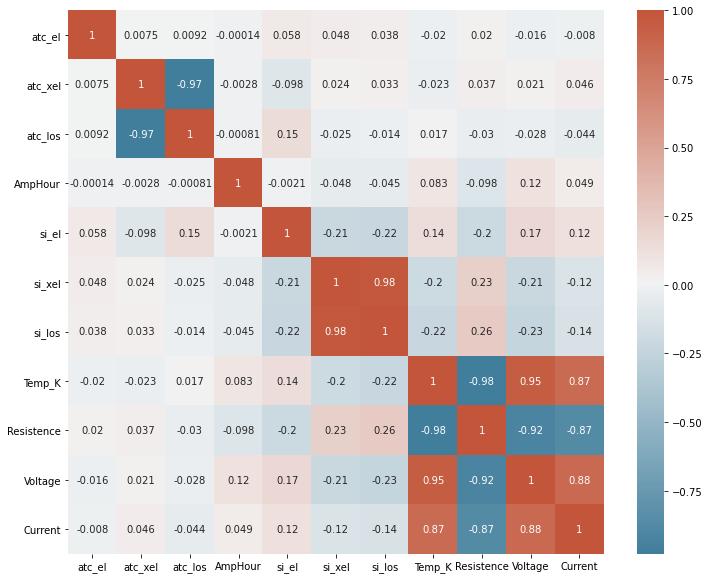

In [165]:
import seaborn as sns
dfm.columns

dfc = dfm[['timestamp','AmpHour','si_el', 'si_xel','si_los','Temp_K', 'Resistence', 'Voltage', 'Current']]


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
#
#
#
# Correlation between different variables
#
corr = df_filled.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = None, cmap=cmap)



(-10.0, 10.0)

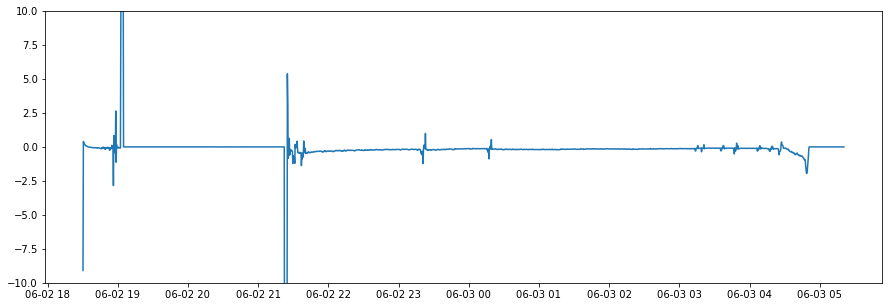

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(dfc.timestamp, dfc.AmpHour)
# ax.plot(df5p17.timestamp.values, df5p17.atc_el.values*10)

ax.set_ylim(-10,10)

In [85]:
len(dfc),len(df5p17),len(dfcm),dfc,df5p17

(1958,
 2491,
 1958,
                timestamp   AmpHour     si_el    si_xel    si_los    Temp_K  \
 0    2022-06-02 18:28:20       NaN       NaN       NaN       NaN  0.227376   
 1    2022-06-02 18:28:40       NaN       NaN       NaN       NaN  0.198711   
 2    2022-06-02 18:29:00       NaN       NaN       NaN       NaN  0.200597   
 3    2022-06-02 18:29:20       NaN       NaN       NaN       NaN  0.199921   
 4    2022-06-02 18:29:40       NaN       NaN       NaN       NaN  0.200005   
 ...                  ...       ...       ...       ...       ...       ...   
 1953 2022-06-03 05:19:20 -0.000873 -0.091390  7.503090 -6.294726  0.234678   
 1954 2022-06-03 05:19:40 -0.000548 -0.107460  7.499857 -6.289576  0.234901   
 1955 2022-06-03 05:20:00 -0.000247       NaN       NaN       NaN  0.235457   
 1956 2022-06-03 05:20:20 -0.000084       NaN       NaN       NaN  0.235746   
 1957 2022-06-03 05:20:40 -0.000066  0.017984  7.720392 -6.027871  0.235998   
 
       Resistence   Voltage  

In [4]:
import plotly.graph_objs as go
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots


primary_yax_title= 'SI XEL acceleration [m/s2]'
secondary_yax_title= 'ADR burn rate [A/h]'
xax_title = 'Datetime [UTC]'
plot_title = 'F881- 400 Hz sensor data'

trace1 = go.Scatter(
    y=dfm['si_xel'],
    x=dfm['timestamp'],
    name='SI Cross Elevation [m/s2]',
    yaxis='y1',
#     annotation_text="setup",
#     annotation_position="top left",
#     annotation_textangle = 90

)
trace2 = go.Scatter(
    y=dfm['AmpHour'],
    x=dfm['timestamp'],
    name='ADR burn rate [A/h]',
    yaxis='y2'

)
# title = '400 Hz sensor data'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)

for i in range(3,len(leginfo)-2):
    legnum=i
    x=leginfo[legnum][0]+pd.DateOffset(days=1)+pd.DateOffset(hours=-7)
#     print(x, str(leginfo[legnum][1]))
    fig.add_vline(x, line_width=2, line_dash="dash", line_color="green"
             )

    
fig['layout'].update(height = 600, width = 1500, title = plot_title,xaxis=dict(tickangle=-90
    ))

# Set x-axis title
fig.update_xaxes(title_text=xax_title)

# Set y-axes titles
fig.update_yaxes(title_text=primary_yax_title, secondary_y=False,color='blue')
fig.update_yaxes(title_text=secondary_yax_title, secondary_y=True,range=[-0.6,0.6],color='blue')


legnum=2
xl=leginfo[legnum][0]+pd.DateOffset(days=1)+pd.DateOffset(hours=-7)
fig.add_annotation(dict(font=dict(color='magenta',size=15),
                                        x=xl,
                                        y=7,
                                        showarrow=False,
                                        text="clear",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))

iplot(fig)

#---------------------------------------------

primary_yax_title= 'SI EL acceleration [m/s2]'
secondary_yax_title= 'ADR burn rate [A/h]'
xax_title = 'Datetime [UTC]'
# plot_title =  'F881-QUENTIN 400 Hz sensor data'

trace1 =  go.Scatter(
    x=dfm['timestamp'],
    y=dfm['si_el'],
    yaxis='y1',
    name='SI Cross Elevation acc. [m/s2]',
    line_dash=None

)
trace2 = go.Scatter(
    y=dfm['AmpHour'],
    x=dfm['timestamp'],
    yaxis='y2',
    name='ADR burn rate [A/h]'
    

)
# title = '400 Hz sensor data'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1500, title = None,xaxis=dict(tickangle=-90
    ))

for i in range(3,len(leginfo)-2):
    legnum=i
    x=leginfo[legnum][0]+pd.DateOffset(days=1)+pd.DateOffset(hours=-7)
#     print(x, str(leginfo[legnum][1]))
    fig.add_vline(x, line_width=2, line_dash="dash", line_color="green"
             )


# Set x-axis title
fig.update_xaxes(title_text=xax_title)

# Set y-axes titles
fig.update_yaxes(title_text=primary_yax_title, secondary_y=False,color='blue')
fig.update_yaxes(title_text=secondary_yax_title, secondary_y=True,range=[-0.6,.6],color='red')

iplot(fig)

###-------------------------------

trace1 =  go.Scatter(
    x=dfm['timestamp'],
    y=dfm['si_los'],
    yaxis='y1',
    name='SI LOS acceleration [m/s2]',
    line_dash=None

)
trace2 = go.Scatter(
    y=dfm['AmpHour'],
    x=dfm['timestamp'],
    yaxis='y2',
    name='ADR burn rate [A/h]'

)
# title = '400 Hz sensor data'
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 1500, title = None,xaxis=dict(tickangle=-90
    ))

for i in range(3,len(leginfo)-2):
    legnum=i
    x=leginfo[legnum][0]+pd.DateOffset(days=1)+pd.DateOffset(hours=-7)
#     print(x, str(leginfo[legnum][1]))
    fig.add_vline(x, line_width=2, line_dash="dash", line_color="green"
             )


# Set x-axis title
fig.update_xaxes(title_text=xax_title)

# Set y-axes titles
fig.update_yaxes(title_text=primary_yax_title, secondary_y=False,color='blue')
fig.update_yaxes(title_text=secondary_yax_title, secondary_y=True,range=[-0.6,0.6],color='red')

iplot(fig)

NameError: name 'dfm' is not defined